In [71]:
%matplotlib inline

import madmom
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import maximum_filter

In [72]:
#log_filt_spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram('madmom/152091.m4a', num_bands=24)
log_filt_spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram('madmom/153036.wav', num_bands=24)
#log_filt_spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram('madmom/153036.m4a', num_bands=24)

In [73]:
superflux_diff = madmom.audio.spectrogram.SpectrogramDifference(log_filt_spec, positive_diffs=True, diff_max_bins=3)
superflux_2 = np.sum(superflux_diff, axis=1)

In [74]:
superflux_3 = madmom.features.onsets.superflux(log_filt_spec)

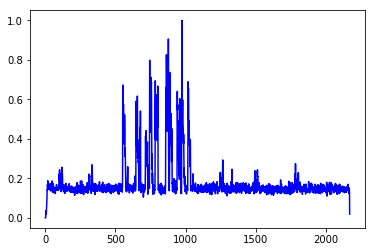

In [75]:
# we scale them to have the same range
plt.figure()
plt.plot(sf / sf.max(), 'b')  # blue
#plt.plot(superflux / superflux.max(), 'g')  # green
#plt.plot(superflux_2 / superflux_2.max(), 'r--')  # dashed red
#plt.plot(superflux_3 / superflux_3.max(), 'k:')  # dotted black

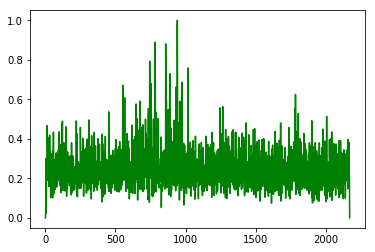

In [76]:
plt.plot(superflux / superflux.max(), 'g')  # green

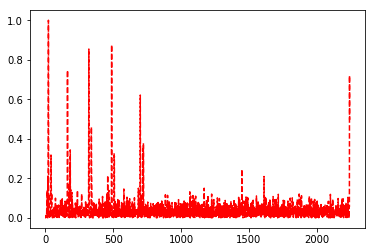

In [77]:
plt.plot(superflux_2 / superflux_2.max(), 'r--')  # dashed red

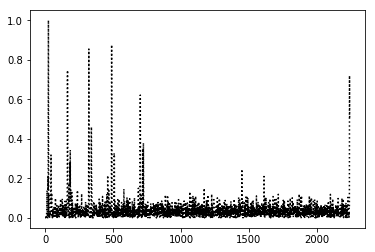

In [78]:
plt.plot(superflux_3 / superflux_3.max(), 'k:')  # dotted black

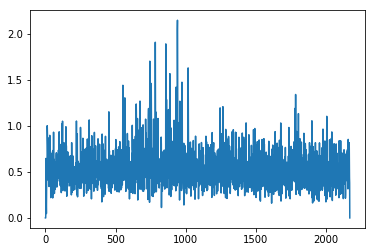

In [79]:
plt.plot(superflux)

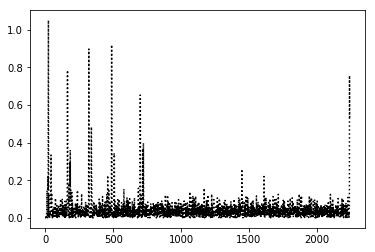

In [80]:
plt.plot(superflux_3, 'k:')  # dotted black

In [88]:
import librosa
peaks = librosa.util.peak_pick(superflux_3, 10, 10, 10, 10, 0.15, 10)
peaks


array([  23,   42,  164,  184,  321,  340,  460,  489,  507,  700,  723,
       1449, 1612, 2242])

In [91]:
librosa.frames_to_time(peaks, sr=sr)

array([ 0.53405896,  0.9752381 ,  3.80807256,  4.27247166,  7.45360544,
        7.89478458, 10.68117914, 11.35455782, 11.77251701, 16.25396825,
       16.78802721, 33.64571429, 37.43056689, 52.05913832])

In [90]:
y, sr = librosa.load('madmom/153036.wav')
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
onset_frames

array([   8,   15,   26,   29,   42,   47,   52,   58,   66,   71,   74,
         78,   84,   95,  103,  108,  117,  125,  132,  150,  156,  162,
        168,  174,  184,  195,  206,  209,  213,  223,  227,  235,  245,
        248,  252,  269,  272,  276,  282,  288,  296,  301,  305,  311,
        319,  324,  331,  343,  349,  366,  371,  374,  382,  384,  392,
        398,  403,  405,  408,  410,  414,  417,  421,  425,  436,  445,
        448,  458,  467,  474,  476,  485,  490,  499,  502,  509,  514,
        519,  523,  526,  531,  539,  547,  552,  556,  563,  568,  575,
        581,  590,  594,  600,  603,  605,  610,  620,  629,  634,  643,
        648,  654,  661,  668,  682,  689,  692,  701,  704,  707,  712,
        716,  721,  728,  735,  740,  746,  752,  755,  762,  773,  781,
        787,  791,  796,  801,  805,  814,  820,  823,  827,  832,  855,
        861,  864,  871,  878,  883,  886,  889,  892,  898,  907,  910,
        915,  918,  924,  932,  937,  946,  958,  9

In [103]:
import librosa
#log_filt_spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram('madmom/153036.wav', num_bands=24)
#log_filt_spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram('madmom/152249.wav', num_bands=24)
log_filt_spec = madmom.audio.spectrogram.LogarithmicFilteredSpectrogram('madmom/225217.wav', num_bands=24)
superflux_3 = madmom.features.onsets.superflux(log_filt_spec)
peaks = librosa.util.peak_pick(superflux_3, 10, 10, 10, 10, 0.1, 10)
peaks_secs = librosa.frames_to_time(peaks, sr=sr)
peaks_secs

array([ 4.87619048,  5.38702948,  9.218322  ,  9.82204082, 14.18739229,
       15.06975057, 19.55120181, 20.7354195 , 22.10539683, 26.7261678 ,
       27.07446712, 32.39183673, 39.54358277])

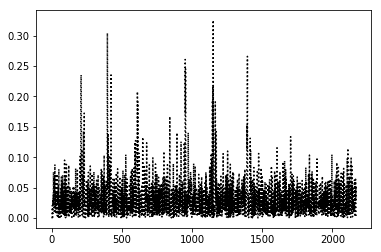

In [104]:
plt.plot(superflux_3, 'k:')  # dotted black

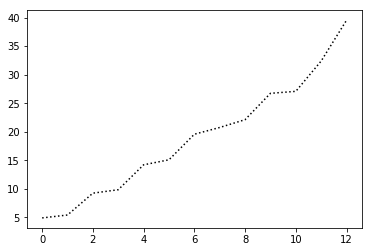

In [106]:
plt.plot(peaks_secs, 'k:')  # dotted black